In [6]:
from mixup_loader import make_loaders, make_reader, make_datasets
from resnet import make_resnet_cifar
from evaluate_metrics import evaluate_model
import torch 
from torch import nn 
from torch.nn import functional as F

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [28]:
reader = make_reader("/home/slaing/ML/2nd_year/sem2/research/CIFAR10H")
train_loader, val_loader, test_loader = make_loaders(reader, use_hard_labels = True, batch_size=256, split_ratio=[0.8, 0.05, 0.15])

In [29]:
pred = torch.randn(10)
# normalize the prediction
pred = F.softmax(pred, dim=0)

pred

tensor([0.0202, 0.0248, 0.0377, 0.7593, 0.0313, 0.0274, 0.0460, 0.0098, 0.0121,
        0.0314])

In [30]:
from torch import Tensor

class SoftTargetCrossEntropyLoss(nn.Module):
    def __init__(self, reduction):
        super(SoftTargetCrossEntropyLoss, self).__init__()

        assert reduction in ("mean", "sum", "none")
        self.reduction = reduction

    def forward(self, x: Tensor, target: Tensor) -> Tensor:
        loss = torch.sum(-target * F.log_softmax(x, dim=-1), dim=-1)

        if self.reduction == "mean":
            return loss.mean()
        elif self.reduction == "sum":
            return loss.sum()
        else:
            return loss

In [24]:
loss2 = SoftTargetCrossEntropyLoss("sum")
loss1 = nn.CrossEntropyLoss()


In [25]:
loss2(pred, label)

tensor(2.3761)

In [26]:
loss1(pred, label)

tensor(2.3761)

In [22]:
model = make_resnet_cifar(depth=20)
model = model.to(device)

In [27]:
for i, (data, target) in enumerate(train_loader):
    outs = model(data)

    loss = loss1(outs, target)
    print(loss)

    loss2 = loss2(outs, target)
    print(loss2)
    break

tensor(2.6044, grad_fn=<DivBackward1>)
tensor(666.7366, grad_fn=<SumBackward0>)


In [11]:
loss = nn.CrossEntropyLoss()

In [13]:
mix = mixup_loader(train_loader,device,  alpha=0.2)

In [14]:
model = make_resnet_cifar(depth=20)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9, weight_decay=1e-4)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones=[50, 75], gamma=0.1)


TypeError: 'DataLoader' object is not an iterator

In [2]:
import numpy as np
import matplotlib.pyplot as plt

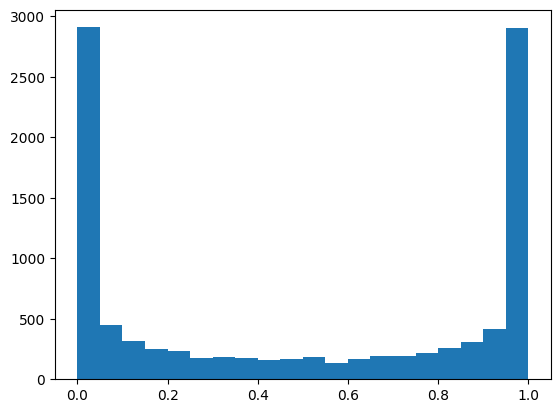

In [5]:
alpha = 0.2
N = 10000

p_list = []
for _ in range(N):
    p = np.random.beta(alpha, alpha)
    p_list.append(p)

plt.hist(p_list, bins=20)
plt.show()


In [15]:
ps = np.array(p_list)

np.std(ps)


0.42190293013710867

In [ ]:
from torchvision import datasets, transforms

